In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

datadir = '/Users/schwarz/Documents/projects/element/research/rto_nime22/user_data/'
p2fam = 'P2/2022-08-30T16-37-21.326Z.txt'
p2exp = 'P2/2022-08-30T16-38-30.262Z.txt'

logfilename = datadir + p2exp

In [25]:
# old load method
df = pd.read_json(logfilename, lines=True)

# split into 3 dataframes by type of line 
datind = df['logtype'] == 'data'
segind = df['logtype'] == 'segment'
evtind = df['logtype'] == 'event'
fbind  = df['logtype'] == 'feedback'

data   = df[datind].dropna(axis=1)
seg    = df[segind].dropna(axis=1)
evt    = df[evtind].dropna(axis=1)
fb     = df[fbind].dropna(axis=1)

(seg['min_dtw_pond'] > 1).cumsum().plot()

In [10]:
# new load method
res, seg = read_log(logfilename)
seg = pd.DataFrame(seg)
seg

0 {'logtype': 'event', 'timestamp0': 108324, 'event': ['Start Condition 1']}
18307 {'logtype': 'event', 'timestamp0': 468323, 'event': ['timer zero']}
18419 {'logtype': 'event', 'timestamp0': 516498, 'event': ['Start Condition 2']}
42796 {'logtype': 'event', 'timestamp0': 876498, 'event': ['timer zero']}


,then,fl,segment_id,worker_0,best_id,min_dtw,min_dtw_pond,model_length,worker_1,avg_dtw,dtw,logtype,random_novelty,condition
0,1338.103889,29,0,1012.520083,0,0.000000,0.000000,0,1012.600977,0.000000,False,segment,0.777,c1
1,2473.256268,30,1,2147.063359,1,11.442261,0.387873,1,2148.027731,0.193937,2,segment,1.025,c1
2,3625.249083,29,2,3299.057443,2,13.133411,0.445200,2,3300.519273,0.277691,1.60322,segment,0.529,c1
3,4729.899664,23,3,4403.798543,3,7.964619,0.300552,3,4405.601096,0.283406,1.0605,segment,2.265,c1
4,5450.566331,28,4,5124.466642,4,45.280930,1.588805,4,5125.475999,0.544486,2.91799,segment,0.529,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,777604.921132,23,1879,777298.461900,1879,20.937885,1.021360,1399,777458.736273,0.637795,1.60139,segment,-99.000,c2
1594,778260.967208,30,1880,777934.775560,1880,16.686763,0.585500,1400,778142.407321,0.637762,0.918054,segment,-99.000,c2
1595,778434.066830,18,1881,778142.699992,1881,6.307462,0.406933,1401,778269.353097,0.637618,0.638208,segment,-99.000,c2
1596,778672.884611,24,1882,778346.665689,1882,13.062395,0.637190,1402,778512.807714,0.637617,0.99933,segment,-99.000,c2


<AxesSubplot:>

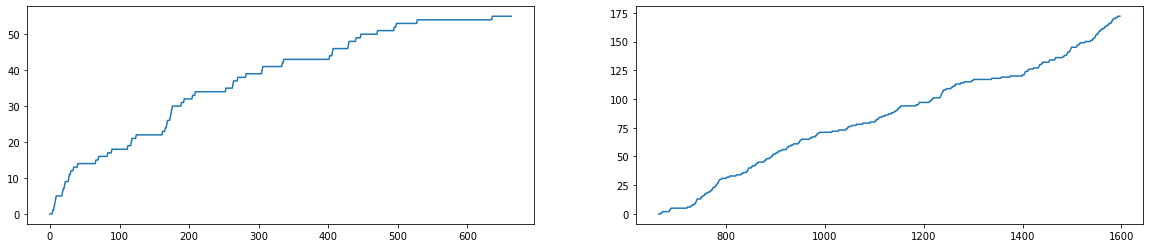

In [23]:
nov1 = select(seg, condition='c1')
nov2 = select(seg, condition='c2')

plt.figure(figsize=(20, 4)) 
plt.subplot(1, 2, 1)
(nov1['min_dtw_pond'] > 1).cumsum().plot()
plt.subplot(1, 2, 2)
(nov2['min_dtw_pond'] > 1).cumsum().plot()

(array([12., 21., 39., 46., 71., 77., 88., 76., 66., 58., 56., 47., 43.,
        47., 30., 27., 26., 20., 14., 12., 12.,  8., 12.,  3.,  0.,  1.,
         5.,  2.,  2.,  1.,  0.,  3.,  1.,  2.,  1.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0.09989613, 0.16174994, 0.22360376, 0.28545757, 0.34731138,
        0.4091652 , 0.47101901, 0.53287283, 0.59472664, 0.65658045,
        0.71843427, 0.78028808, 0.8421419 , 0.90399571, 0.96584952,
        1.02770334, 1.08955715, 1.15141097, 1.21326478, 1.27511859,
        1.33697241, 1.39882622, 1.46068004, 1.52253385, 1.58438766,
        1.64624148, 1.70809529, 1.76994911, 1.83180292, 1.89365673,
        1.95551055, 2.01736436, 2.07921818, 2.14107199, 2.2029258 ,
        2.26477962, 2.32663343, 2.38848725, 2.45034106, 2.51219487,
        2.57404869, 2.6359025 , 2.69775632, 2.75961013, 2.82146395,
        2.88331776, 2.94517157, 3.00702539, 3.0688792 , 3.13073302,
        3.19258683]),
 <BarContainer

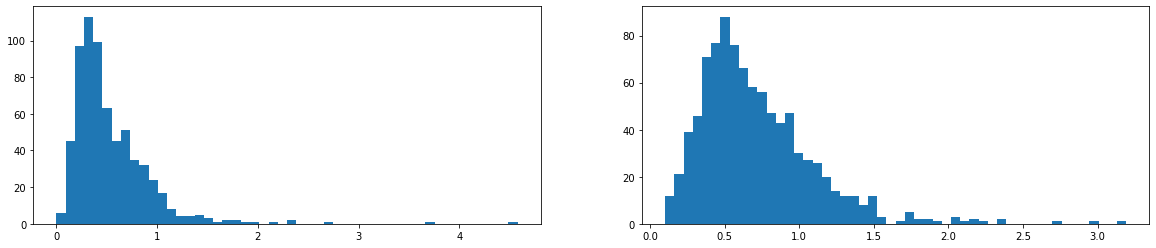

In [28]:
plt.figure(figsize=(20, 4)) 
plt.subplot(1, 2, 1)
plt.hist(nov1['min_dtw_pond'], 50)
plt.subplot(1, 2, 2)
plt.hist(nov2['min_dtw_pond'], 50)